In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

OBJECTIVE = "OBJECTIVE"
INEQUALITY_CONSTRAINT_ONE = "INEQUALITY_CONSTRAINT_ONE"
INEQUALITY_CONSTRAINT_TWO = "INEQUALITY_CONSTRAINT_TWO"

In [3]:
def process_ts_ackley_results(result_dir: str,
                           num_runs: int,
                           failure_val: float):
    all_results = []
    for run in range(num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        inequality_constraint_one_satisfied = run_data[INEQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze() <= 0
        inequality_constraint_two_satisfied = run_data[INEQUALITY_CONSTRAINT_TWO].observations.numpy().squeeze() <= 0
        satisfied_mask = np.logical_and(inequality_constraint_one_satisfied, inequality_constraint_two_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        safe_obs_values = objective_vals.copy()
        assert (safe_obs_values.shape == failure_mask.shape)
        safe_obs_values[failure_mask] = failure_val
        safe_obs_values = safe_obs_values * 10.0
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

### Ackley10

In [46]:
tr_res, tr_mean, tr_median, tr_std = process_ts_ackley_results("final_ts_al_results/ackley_10/trust_region/data/", num_runs=24, failure_val=1.0)
vanilla_res, vanilla_mean, vanilla_median, vanilla_std = process_ts_ackley_results("final_ts_al_results/ackley_10/vanilla/data/", num_runs=24, failure_val=1.0)
scbo_res, scbo_mean, scbo_median, scbo_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
scbo_vanilla_res, scbo_vanilla_mean, scbo_vanilla_median, scbo_vanilla_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/vanilla/data/", num_runs=30, failure_val=1.0)
scbo_vanilla_random_res, scbo_vanilla_random_mean, scbo_vanilla_random_median, scbo_vanilla_random_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/vanilla_random/data/", num_runs=10, failure_val=1.0)
bilog_res, bilog_mean, bilog_median, bilog_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/trust_region_bilog/data/", num_runs=30, failure_val=1.0)

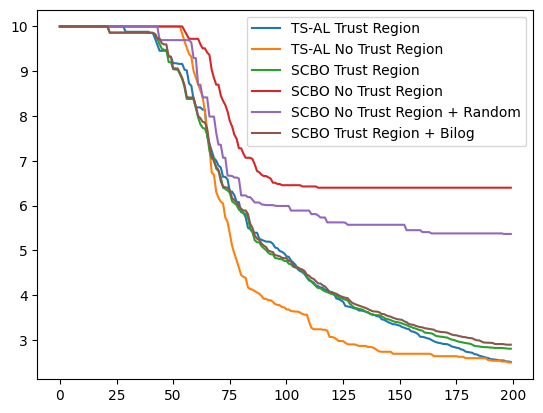

In [47]:
plt.plot(tr_mean, label="TS-AL Trust Region")
plt.plot(vanilla_mean, label="TS-AL No Trust Region")
plt.plot(scbo_mean, label="SCBO Trust Region")
plt.plot(scbo_vanilla_mean, label="SCBO No Trust Region")
plt.plot(scbo_vanilla_random_mean, label="SCBO No Trust Region + Random")
plt.plot(bilog_mean, label="SCBO Trust Region + Bilog")
plt.legend()

In [52]:
def process_lockwood_results(result_dir: str,
                       num_runs: int,
                       failure_val: float):
    all_results = []
    for run in range(10, 10 + num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        inequality_constraint_one_satisfied = run_data[INEQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze() <= 0
        inequality_constraint_two_satisfied = run_data[INEQUALITY_CONSTRAINT_TWO].observations.numpy().squeeze() <= 0
        satisfied_mask = np.logical_and(inequality_constraint_one_satisfied, inequality_constraint_two_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        objective_vals = objective_vals * 10000
        safe_obs_values = objective_vals.copy()
        safe_obs_values[failure_mask] = failure_val
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [41]:
lockwood_tr_res, lockwood_tr_mean, lockwood_tr_median, lockwood_tr_std = process_lockwood_results("final_ts_al_results/lockwood/trust_region/data/", num_runs=11, failure_val=60000.0)
lockwood_vanilla_res, lockwood_vanilla_mean, lockwood_vanilla_median, lockwood_vanilla_std = process_lockwood_results("final_ts_al_results/lockwood/vanilla_adam/data/", num_runs=22, failure_val=60000.0)

In [11]:
bfgs_res, bfgs_mean, bfgs_median, bfgs_std = process_lockwood_results("final_ts_al_results/lockwood/l-bfgs-b/data/", num_runs=21, failure_val=60000.0)

In [53]:
scbo_res, scbo_mean, scbo_median, scbo_std = process_lockwood_results("experimental_scbo_results/lockwood/trust_region/data/", num_runs=15, failure_val=60000.0)

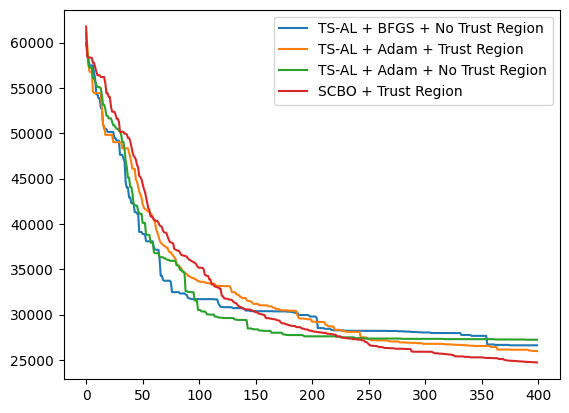

In [54]:
plt.plot(bfgs_mean, label="TS-AL + BFGS + No Trust Region")
plt.plot(lockwood_tr_mean, label="TS-AL + Adam + Trust Region")
plt.plot(lockwood_vanilla_mean, label="TS-AL + Adam + No Trust Region")
plt.plot(scbo_mean, label="SCBO + Trust Region")
plt.legend()
plt.show()

In [25]:
key_iterations = [100, 250, 400]

In [43]:
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(bfgs_res, 5, axis=0)[iter-1]}, Median: {np.percentile(bfgs_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(bfgs_res, 95, axis=0)[iter-1]}")

Iter: 100
5%: 25922.19, Median: 30074.24, 95%: 47265.62
Iter: 250
5%: 25166.2, Median: 27672.57, 95%: 30014.26
Iter: 400
5%: 24497.18, Median: 26882.16, 95%: 28519.0


In [55]:
print("SCBO + Trust Region")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(scbo_res, 5, axis=0)[iter-1]}, Median: {np.percentile(scbo_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(scbo_res, 95, axis=0)[iter-1]}")

SCBO + Trust Region
Iter: 100
5%: 27243.987, Median: 33615.45, 95%: 46825.34299999999
Iter: 250
5%: 24051.797000000002, Median: 26131.000000000004, 95%: 31004.293
Iter: 400
5%: 23252.013000000003, Median: 24411.81, 95%: 26922.423


In [44]:
print(f"TS-AL + Trust Region")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(lockwood_tr_res, 5, axis=0)[iter-1]}, Median: {np.percentile(lockwood_tr_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(lockwood_tr_res, 95, axis=0)[iter-1]}")

TS-AL + Trust Region
Iter: 100
5%: 25607.575, Median: 32526.929999999997, 95%: 44303.475
Iter: 250
5%: 24155.115, Median: 27129.31, 95%: 30915.21
Iter: 400
5%: 23533.309999999998, Median: 25657.54, 95%: 30190.57


In [45]:
print("TS-AL + No Trust Region")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(lockwood_vanilla_res, 5, axis=0)[iter-1]}, Median: {np.percentile(lockwood_vanilla_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(lockwood_vanilla_res, 95, axis=0)[iter-1]}")

TS-AL + No Trust Region
Iter: 100
5%: 26518.120499999997, Median: 29537.3, 95%: 34296.768
Iter: 250
5%: 25844.023999999998, Median: 27452.190000000002, 95%: 28570.438
Iter: 400
5%: 25844.023999999998, Median: 27376.0, 95%: 28557.32
